# Final Project - Image Processing

## Group Members (Name/USP ID):
- André Seiti Caniza 9790923
- Bruno Waldvogel 9857690
- Marcel Otoboni de Lima 9791069


## Section 1 - Function Definitions

In [0]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from math import inf

In [0]:
class Pixelizer:
  
  def __init__(self):
    self.img = None
    self.palette = None
  
  def read_image(self, filename):
    """ This function reads an image given by a relative file path <filename>.
    
    Arguments:
      filename (string) - The relative path to the file.
    """
    # Reading the image and assigning the color to RGB
    img = cv2.imread(filename, cv2.IMREAD_UNCHANGED)
    self.img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  
  def extract_dominant_colors(self, n_colors):
    """ This function extracts the <n_colors> most dominant colors present in an image
    using the K-Means clustering algorithm, to later be used as a palette in the 
    pixelized version of the image.
    
    Arguments:
      n_colors(int) - The number of colors in the palette.
      
    Returns:
      The most dominant colors in an image.
    """
    # Extracting the width, height and depth of an image
    width, height, depth = self.img.shape
    copied_img = np.copy(self.img)

    # Getting a list of all the pixel values
    all_pixels = copied_img.reshape((width * height, depth))

    # Using the K-Means algorithm to extract the dominant colors
    k_means = KMeans(n_clusters=n_colors).fit(all_pixels)

    # Returning the dominant colors to the caller
    return k_means.cluster_centers_.astype(np.uint8)
  
  def assign_color_to_block(self, mean_values):
    """ This function checks to see which color must be assigned for each block
    of pixels in the pixelized image, using the minimum Euclidian Distance 
    between the colors as the deciding factor.
    
    Arguments:
      mean_values(list) - A list containing mean values for the R,G,B components of a block.
    
    Returns:
      The chosen color to be assigned to a block. Format-> list()
    """
    chosen_color = 0
    min_eucl_dist = inf
    
    # For each color in the palete
    for j in range(0,len(self.palette)):
      # Performing the euclidian distance and checking to see if it is the minimum that we want
      eucl_dist = np.sum(np.power(np.subtract(mean_values, self.palette[j]), 2))
      # Check to see if this color should be used or not
      if(eucl_dist < min_eucl_dist):
        min_eucl_dist = eucl_dist
        chosen_color = j
        
    # Returning the color to be assigned back to the caller
    return self.palette[chosen_color]
    
  def pixelize(self, filename, factor, threshold, n_colors, contour=False):
    """ This function applies the pixelization effect encountered in pixel-art
    to a given image, giving the relative path <filename> to the image, the number of
    blocks that it will be divided into, the threshold for the black iconified contour and
    the number of colors considered in the palette of colors.
    
    Arguments:
      filename(string) - The relative path to the image.
      factor(int) - The factor to divide the image into blocks.
      threshold(int) - 0-255 value corresponding to the minimum threshold for the contour separation.
      n_colors(int) - The number of colors to be considered in the palette of colors.
      contour(bool) - True of False indicating if the image will have the iconic black contour.
      
    Returns:
      The pixelized image.
    """
    # Reading the image
    self.read_image(filename)
    
    # Copying the image so that we dont lose the original one
    img = np.copy(self.img)
    
    # Extracting the dominant colors to be used in the pixel art palette
    self.palette = self.extract_dominant_colors(n_colors)[:, :3]
    
    # Applying a black contour to the image, typical of the pixel-art art style
    if(contour):
      gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
      _, thresh = cv2.threshold(gray_img, threshold, 255, 0)
      _, contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
      cv2.drawContours(img, contours, -1, (0,0,0), int(np.ceil(img.shape[0] * img.shape[1] * 0.000005)))
    
    # Calculating the width and height of each block of pixels
    blockWidth = img.shape[0] // factor
    blockHeight = img.shape[1] // factor
    
    # Assigning colors to each block after calculating the mean RGB values for each block
    # and performing a lookup in a palette of pre-defined colors
    for i in range(0, img.shape[0], blockHeight):
      for j in range(0, img.shape[1], blockWidth):
        aux = img[i : i+blockHeight, j:j+blockWidth, :]
        mean_r = np.mean(aux[:,:,0])
        mean_g = np.mean(aux[:,:,1])
        mean_b = np.mean(aux[:,:,2])
        mean_values = [mean_r ,mean_g, mean_b]
        chosen_color = self.assign_color_to_block(mean_values)
        img[i : i+blockHeight, j : j+blockWidth] = chosen_color
    
    # Returning the pixelized image back to the caller
    return img

## Section 2 - Results

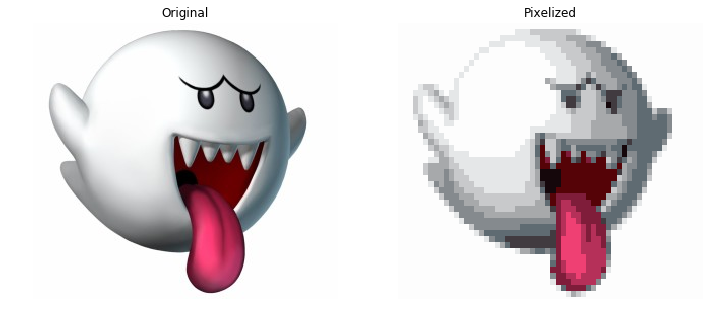

In [146]:
pix = Pixelizer()
fig = plt.figure(figsize=(12, 12))

original = cv2.imread('boo.jpg', cv2.IMREAD_UNCHANGED)
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)

fig.add_subplot(1, 2, 1)
plt.grid(False)
plt.title("Original")
plt.axis('off')
plt.imshow(original)

boo1 = pix.pixelize('boo.jpg', 50, 200, 12, False)
fig.add_subplot(1, 2, 2)
plt.grid(False)
plt.title("Pixelized")
plt.axis('off')
plt.imshow(boo1)

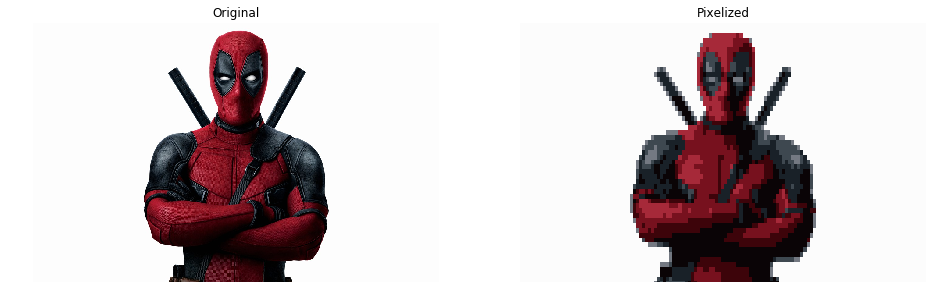

In [169]:
from PIL import ImageEnhance
fig = plt.figure(figsize=(16, 16))

original = cv2.imread('deadpool.jpg', cv2.IMREAD_UNCHANGED)
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)

fig.add_subplot(1, 2, 1)
plt.grid(False)
plt.title("Original")
plt.axis('off')
plt.imshow(original)

deadp1 = pix.pixelize('deadpool.jpg', 80, 200, 8, False)
fig.add_subplot(1, 2, 2)
plt.grid(False)
plt.title("Pixelized")
plt.axis('off')
plt.imshow(deadp1)

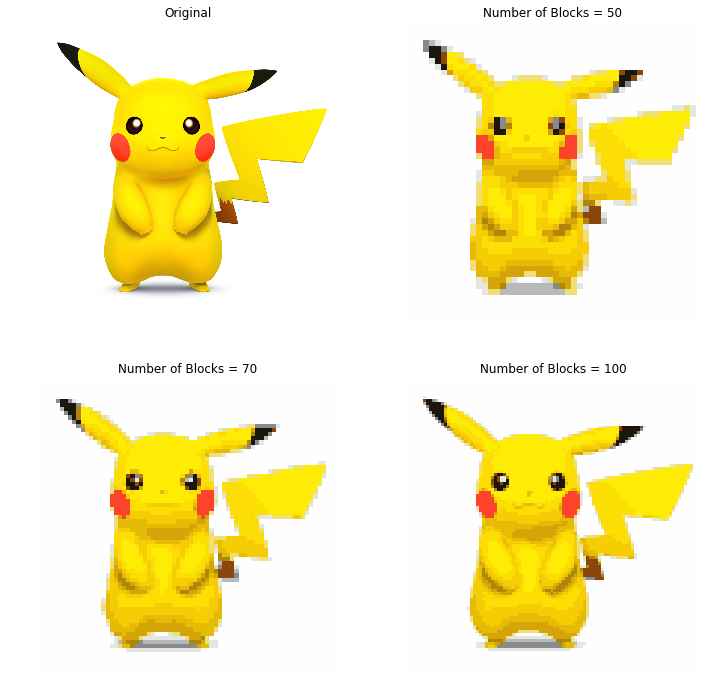

In [123]:
fig = plt.figure(figsize=(12, 12))

original = cv2.imread('pikachu.jpg', cv2.IMREAD_UNCHANGED)
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)

fig.add_subplot(2, 2, 1)
plt.grid(False)
plt.title("Original")
plt.axis('off')
plt.imshow(original)

pik1 = pix.pixelize('pikachu.jpg', 50, 200, 14, False)
fig.add_subplot(2, 2, 2)
plt.grid(False)
plt.title("Number of Blocks = 50")
plt.axis('off')
plt.imshow(pik1)

pik2 = pix.pixelize('pikachu.jpg', 70, 200, 14, False)
fig.add_subplot(2, 2, 3)
plt.title("Number of Blocks = 70")
plt.axis('off')
plt.grid(False)
plt.imshow(pik2)

pik3 = pix.pixelize('pikachu.jpg', 100, 200, 14, False)
fig.add_subplot(2, 2, 4)
plt.title("Number of Blocks = 100")
plt.axis('off')
plt.grid(False)
plt.imshow(pik3)

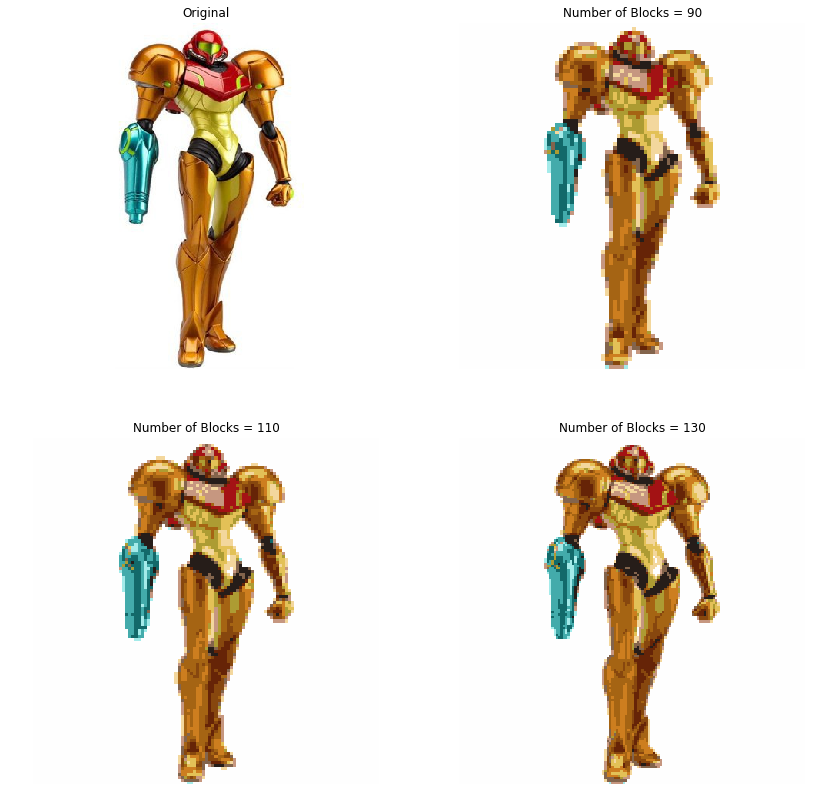

In [135]:
fig = plt.figure(figsize=(14, 14))

original = cv2.imread('samus.jpeg', cv2.IMREAD_UNCHANGED)
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)

fig.add_subplot(2, 2, 1)
plt.grid(False)
plt.title("Original")
plt.axis('off')
plt.imshow(original)

samus1 = pix.pixelize('samus.jpeg', 70, 200, 15, False)
fig.add_subplot(2, 2, 2)
plt.grid(False)
plt.title("Number of Blocks = 90")
plt.axis('off')
plt.imshow(samus1)

samus2 = pix.pixelize('samus.jpeg', 90, 200, 15, False)
fig.add_subplot(2, 2, 3)
plt.title("Number of Blocks = 110")
plt.axis('off')
plt.grid(False)
plt.imshow(samus2)

samus3 = pix.pixelize('samus.jpeg', 110, 200, 15, False)
fig.add_subplot(2, 2, 4)
plt.title("Number of Blocks = 120")
plt.axis('off')
plt.grid(False)
plt.imshow(samus3)

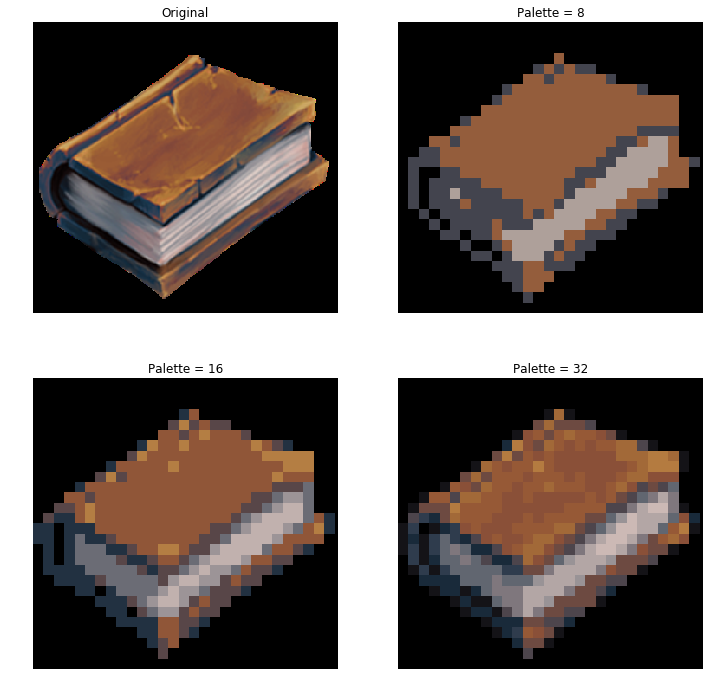

In [159]:
book0 = cv2.imread('book.png', cv2.IMREAD_UNCHANGED)
book0 = cv2.cvtColor(book0, cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(12, 12))

fig.add_subplot(2, 2, 1)
plt.grid(False)
plt.title("Original")
plt.axis('off')
plt.imshow(book0)

book1 = pix.pixelize('book.png', 28, 200, 4, False)
fig.add_subplot(2, 2, 2)
plt.grid(False)
plt.title("Palette = 8")
plt.axis('off')
plt.imshow(book1)

book2 = pix.pixelize('book.png', 28, 200, 8, False)
fig.add_subplot(2, 2, 3)
plt.title("Palette = 16")
plt.axis('off')
plt.grid(False)
plt.imshow(book2)

book3 = pix.pixelize('book.png', 28, 200, 16, False)
fig.add_subplot(2, 2, 4)
plt.title("Palette = 32")
plt.axis('off')
plt.grid(False)
plt.imshow(book3)